In [15]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


We are going to focus on 2 csv files from regarding player stats. 
1. player_index.csv: An index of all players with general information.
2. player_stats_traditional_po.csv:  Traditional player statistics during the playoffs.

Lets have a look at them and its columns, we can also check the number of players(rows) and if there are columns with missing data.

In [16]:
players=pd.read_csv("nba_dataset/player/player_index.csv")
p_trad_po=pd.read_csv("nba_dataset/player/player_stats_traditional_po.csv")

# Check the columns
print("Number of players:"+str(players.shape[0]))

# Check the types of data per column
print("Data Types per Column:")
print(players.dtypes)

# Check for missing values
print("\nMissing Values per Column:")
print(players.isnull().sum())

players.head()


Number of players:4820
Data Types per Column:
Unnamed: 0             int64
PERSON_ID              int64
PLAYER_LAST_NAME      object
PLAYER_FIRST_NAME     object
PLAYER_SLUG           object
TEAM_ID                int64
TEAM_SLUG             object
IS_DEFUNCT             int64
TEAM_CITY             object
TEAM_NAME             object
TEAM_ABBREVIATION     object
JERSEY_NUMBER         object
POSITION              object
HEIGHT                object
WEIGHT               float64
COLLEGE               object
COUNTRY               object
DRAFT_YEAR           float64
DRAFT_ROUND          float64
DRAFT_NUMBER         float64
ROSTER_STATUS        float64
PTS                  float64
REB                  float64
AST                  float64
STATS_TIMEFRAME       object
FROM_YEAR              int64
TO_YEAR                int64
dtype: object

Missing Values per Column:
Unnamed: 0              0
PERSON_ID               0
PLAYER_LAST_NAME        0
PLAYER_FIRST_NAME       1
PLAYER_SLUG             0

,Unnamed: 0,PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,0,76001,Abdelnaby,Alaa,alaa-abdelnaby,1610612757,blazers,0,Portland,Trail Blazers,...,1990.0,1.0,25.0,NaN,5.7,3.3,0.3,Career,1990,1994
1,1,76002,Abdul-Aziz,Zaid,zaid-abdul-aziz,1610612745,rockets,0,Houston,Rockets,...,1968.0,1.0,5.0,NaN,9.0,8.0,1.2,Career,1968,1977
2,2,76003,Abdul-Jabbar,Kareem,kareem-abdul-jabbar,1610612747,lakers,0,Los Angeles,Lakers,...,1969.0,1.0,1.0,NaN,24.6,11.2,3.6,Career,1969,1988
3,3,51,Abdul-Rauf,Mahmoud,mahmoud-abdul-rauf,1610612743,nuggets,0,Denver,Nuggets,...,1990.0,1.0,3.0,NaN,14.6,1.9,3.5,Career,1990,2000
4,4,1505,Abdul-Wahad,Tariq,tariq-abdul-wahad,1610612758,kings,0,Sacramento,Kings,...,1997.0,1.0,11.0,NaN,7.8,3.3,1.1,Career,1997,2003


In [17]:
# Check the columns
print("Number of players:"+str(p_trad_po.shape[0]))

# Check the types of data per column
print("Data Types per Column:")
print(p_trad_po.dtypes)

# Check for missing values
print("\nMissing Values per Column:")
print(p_trad_po.isnull().sum())

p_trad_po.head()



Number of players:5435
Data Types per Column:
PLAYER_ID                 int64
PLAYER_NAME              object
NICKNAME                 object
TEAM_ID                   int64
TEAM_ABBREVIATION        object
                          ...  
NBA_FANTASY_PTS_RANK      int64
DD2_RANK                  int64
TD3_RANK                  int64
WNBA_FANTASY_PTS_RANK     int64
SEASON                   object
Length: 67, dtype: object

Missing Values per Column:
PLAYER_ID                0
PLAYER_NAME              0
NICKNAME                 0
TEAM_ID                  0
TEAM_ABBREVIATION        0
                        ..
NBA_FANTASY_PTS_RANK     0
DD2_RANK                 0
TD3_RANK                 0
WNBA_FANTASY_PTS_RANK    0
SEASON                   0
Length: 67, dtype: int64


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,SEASON
0,243,Aaron McKie,Aaron,1610612765,DET,24.0,5,2,3,0.400,...,31,83,82,123,43,102,47,1,106,1996-97
1,228,Adam Keefe,Adam,1610612762,UTA,27.0,9,5,4,0.556,...,127,163,166,170,73,149,47,1,154,1996-97
2,673,Alan Henderson,Alan,1610612737,ATL,24.0,10,4,6,0.400,...,106,76,68,96,110,113,47,1,109,1996-97
3,275,Allan Houston,Allan,1610612752,NYK,26.0,9,6,3,0.667,...,22,123,82,15,41,45,47,1,34,1996-97
4,297,Alonzo Mourning,Alonzo,1610612748,MIA,27.0,17,8,9,0.471,...,47,8,24,25,35,20,6,1,17,1996-97


Only for the dataset "players" we can see missing data, traditional stats and usage data are completed and no data is missing. The missing data in the players dataset it does not make such a difference. Nonetheless, we will monitor its influence in case we use any of the columns with missing data.

## QUESTION 1
The first question that we would like to answer, and that will name the blog after that, is if the NBA (National Basketball Asocciation) has become an international basketball association. For that, we will check the column Country.

In [18]:
# See countries
print("\nCountries listed:")
print(players.COUNTRY.unique())

# is there any missing values, if so, what are they?

# Check for missing values
print("\nMissing Values per Column:")
print(players.COUNTRY.isnull().sum())


Countries listed:
['USA' 'France' 'Spain' 'Nigeria' 'New Zealand' 'South Sudan'
 'Trinidad and Tobago' 'Turkey' 'Canada' 'United Kingdom' 'Australia'
 'Lithuania' 'Greece' 'Macedonia' 'Brazil' 'Scotland' 'Puerto Rico'
 'Israel' 'Mexico' 'Bahamas' 'Senegal' 'Croatia' 'Italy' 'China' 'Uruguay'
 'Russia' 'US Virgin Islands' 'Ghana' 'Latvia' 'Georgia' 'DRC' 'Serbia'
 'Sudan' 'Argentina' 'Ukraine' 'Germany' 'Cuba' 'Saint Lucia' 'Slovenia'
 'Norway' 'Ireland' 'Switzerland' 'Haiti' 'Dominican Republic' 'Guinea'
 'Mali' 'Colombia' 'Netherlands' 'Cameroon' 'Jamaica' 'Congo' 'Angola'
 'Panama' 'St. Vincent & Grenadines' 'Bulgaria' 'Poland' 'South Korea'
 'Japan' 'Iran' 'Democratic Republic of the Congo' 'Sweden'
 'Czech Republic' 'Gabon' 'Denmark' 'Finland' 'Belgium' 'Tunisia'
 'Montenegro' 'Romania' 'Bosnia and Herzegovina' 'Estonia' nan 'Egypt'
 'Belize' 'Antigua and Barbuda' 'Austria' 'Portugal' 'Cabo Verde'
 'Tanzania' 'Venezuela']

Missing Values per Column:
1


In [19]:
#There is only one, lets check it out
players[players.COUNTRY.isnull()]

,Unnamed: 0,PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
3081,3081,1626122,N'diaye,Makhtar,makhtar-ndiaye,1610612763,grizzlies,0,Memphis,Grizzlies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Career,1998,1998


We could remove this player from the dataset since he was undrafted and there are no records of stats, but since it is only one player we can quickly google his name and find that he is from Senegal. So for the sake of the question,  we can add this data to the dataset and use it.

In [20]:
# correcting missing data
players.loc[3081, 'COUNTRY']='Senegal'
# review
# Check for missing values
print("\nMissing Values per Column:")
print(players.COUNTRY.isnull().sum())


Missing Values per Column:
0


Now, let's create a new column grouping all countries except United States to see if the league is now international. The new column will be called 'international' and will be 0 in case of the country being USA or 1 if the country is other.
In this case we will convert a categorial column COUNTRY into a binary column 'international'.
Let's plot the evolution of that every year.

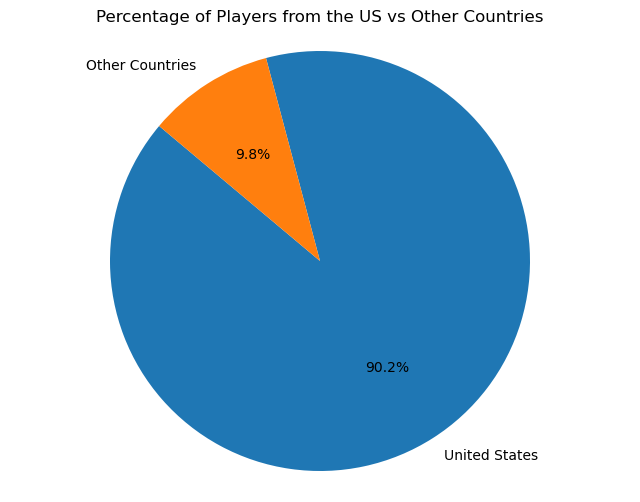

In [21]:
# Create a new column based on country
players['international'] = (players['COUNTRY'] != 'USA').astype(int)

# Calculate the percentage of players from the US and from other countries
percentages = players['international'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=['United States', 'Other Countries'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Players from the US vs Other Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We can see that the dataset players from 1997 to 2023 contains a vast majority of US players, but lets find out if that is the case for the players on playoff teams.

## QUESTION 2
Is that stable in the case of playoffs teams? We want to see if we can keep this percentages for playoffs teams. So, we would need to bring the COUNTRY column to the players traditional stats dataset

In [22]:
# Merge the best_ply_po DataFrame with the players DataFrame on TEAM_ID
p_trad_po_country = pd.merge(p_trad_po, players[['TEAM_ID', 'COUNTRY']], on='TEAM_ID', how='left')

In [23]:
# Check for missing values
print("\nMissing Values per Column:")
print(p_trad_po_country.COUNTRY.isnull().sum())


Missing Values per Column:
0


Use the categorical column COUNTRY to binary for calculations as before

In [24]:
# Create a new column based on country
p_trad_po_country['international'] = (p_trad_po_country['COUNTRY'] != 'USA').astype(int)

In [25]:
# Check for missing values
print("\nMissing Values per Column:")
print(p_trad_po_country.international.isnull().sum())


Missing Values per Column:
0


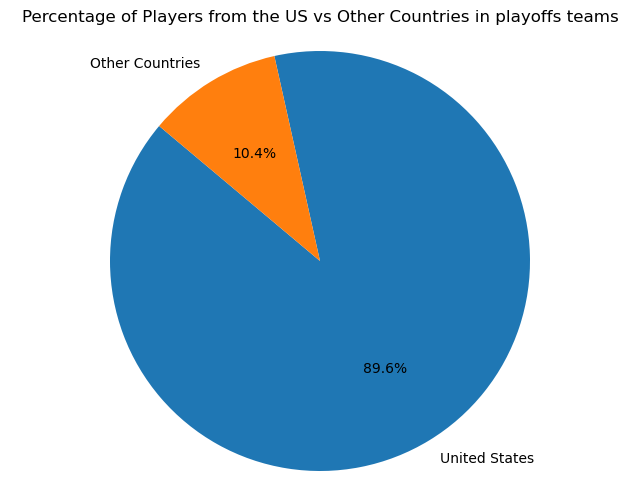

In [26]:
# Calculate the percentage of players from the US and from other countries
percentages_po = p_trad_po_country['international'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages_po, labels=['United States', 'Other Countries'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Players from the US vs Other Countries in playoffs teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We see that the percentage only varies a little bit, maintaining a vast majority of US players.


## QUESTION 3
The amount of international players in playoff teams grows in recent years or has been always around a 10%?
To response this, we need to check the evolution every season.

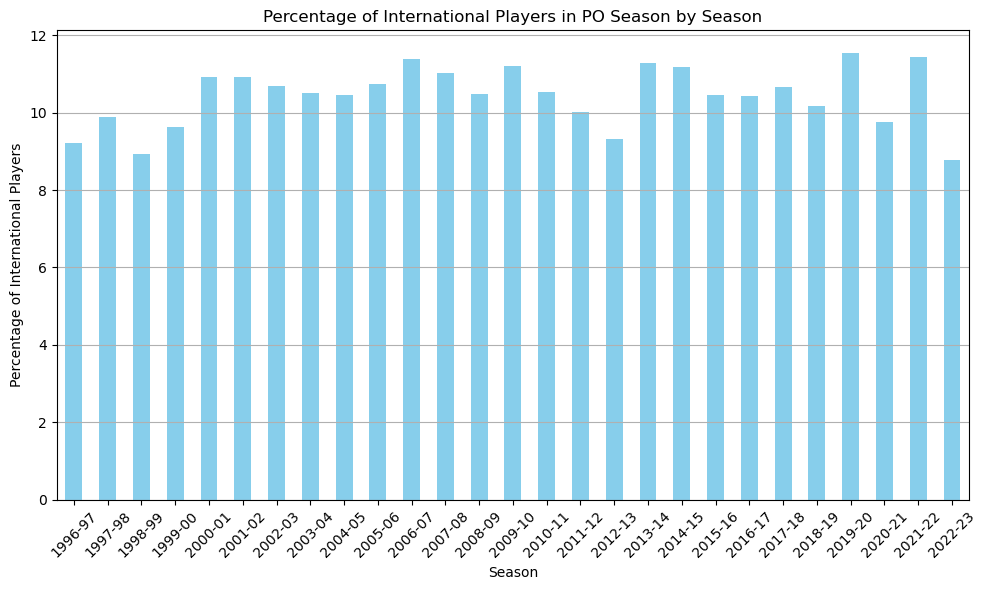

In [27]:
# Group by season and calculate the percentage of international players
season_international_percentage = p_trad_po_country.groupby('SEASON')['international'].mean() * 100

# Plotting the percentage of international players season by season
def plot_by_year(df,title):
    '''
    This function creates a graph with the international player percentage for each season
    Input:
    data group by season, with the international player percentage
    Output
    A bar plot
    '''
    plt.figure(figsize=(10, 6))
    df.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel('Percentage of International Players')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
plot_by_year(season_international_percentage,'Percentage of International Players in PO Season by Season')

We see that the percentage over each season is very stable around a 10%. So, we can derived that the NBA is still very national. However, is that the case for the biggest superstars?

## QUESTION 4
Are the biggest superstars also american? or in that case the percentage are more balanced? To evaluate which are the best players we can create a new column summarizing the positive aspects on the game.

In [28]:
# lets create a new column based on a very basic stat that sums PTS, ASSISTS, REBOUNDS STEALS, BLOCKS
p_trad_po_country['TOTAL_SCORE'] = p_trad_po_country['PTS'] + p_trad_po_country['REB'] + p_trad_po_country['AST'] + p_trad_po_country['STL'] + p_trad_po_country['BLK']


Lets see what is the ditribution of that metric to check which are the values for those superstars.

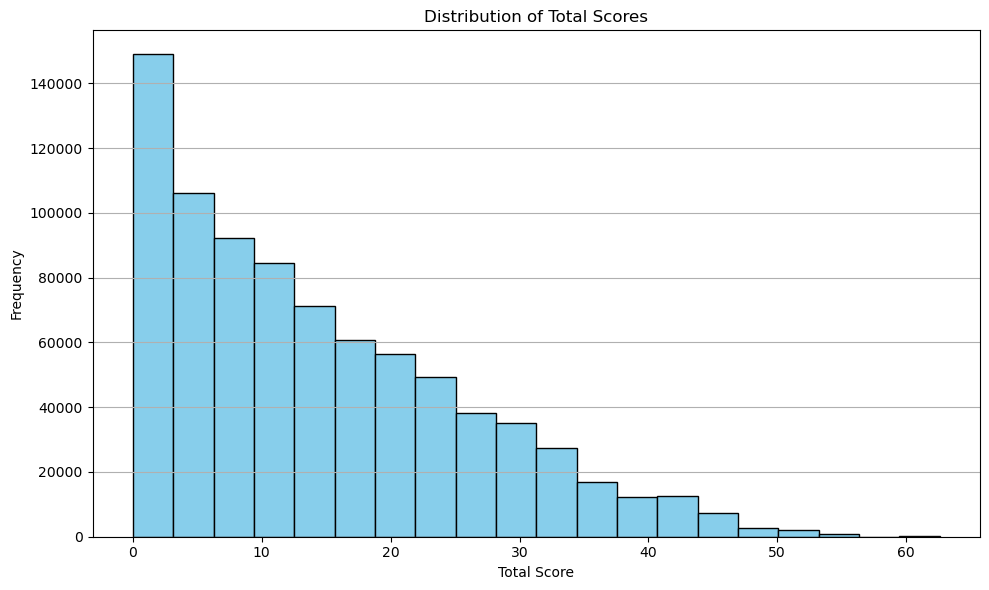

In [29]:
# Plotting the distribution of TOTAL_SCORE
plt.figure(figsize=(10, 6))
plt.hist(p_trad_po_country['TOTAL_SCORE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [30]:
# Select the real superstasrs players with the highest TOTAL_SCORE
best_ply_po = p_trad_po_country[p_trad_po_country['TOTAL_SCORE'] >= 50]


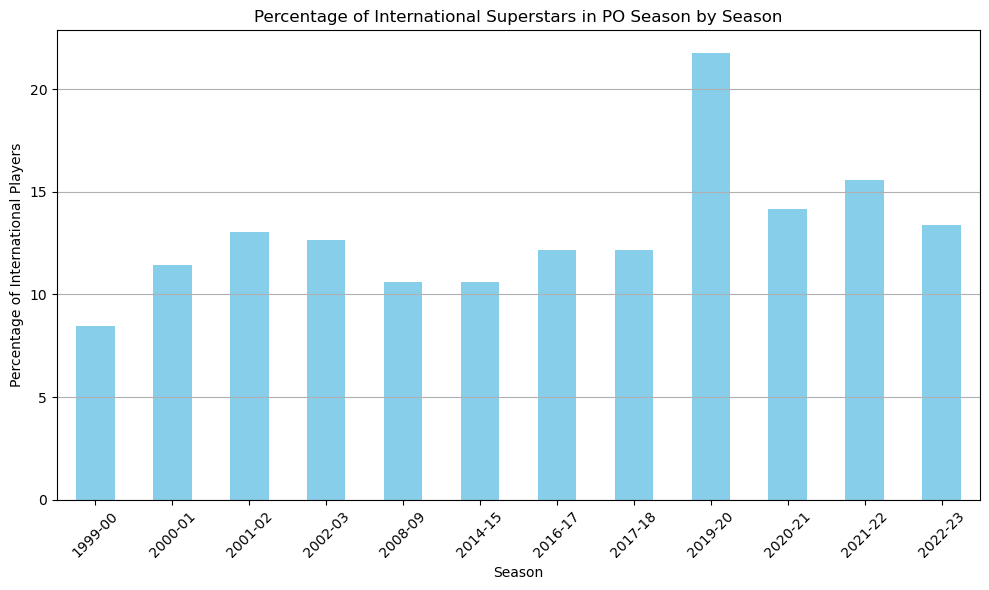

In [31]:
# Group by season and calculate the percentage of international players
season_international_percentage = best_ply_po.groupby('SEASON')['international'].mean() * 100

# Plotting the percentage of international players season by season
plot_by_year(season_international_percentage,'Percentage of International Superstars in PO Season by Season')

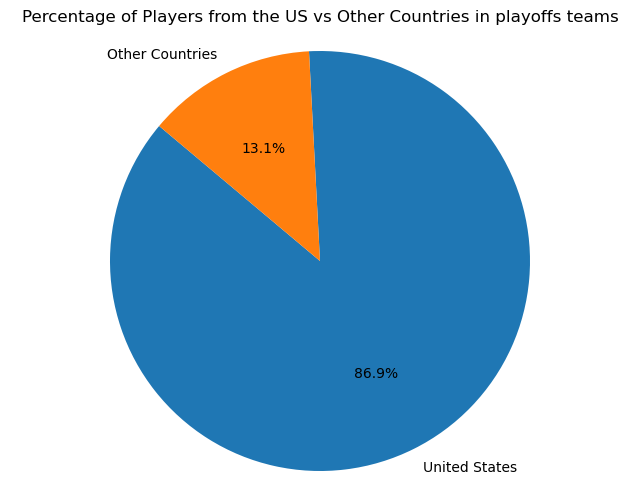

In [100]:
# Calculate the percentage of players from the US and from other countries
percentages_po_best = best_ply_po['international'].value_counts(normalize=True) * 100


# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages_po_best, labels=['United States', 'Other Countries'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Players from the US vs Other Countries in playoffs teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [96]:
best_ply_po

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,SEASON,TOTAL_SCORE,Rank,COUNTRY,international
111158,406,Shaquille O'Neal,Shaquille,1610612747,LAL,28.0,23,15,8,0.652,...,12,1,1,5,1,1999-00,52.2,10.0,USA,0
111159,406,Shaquille O'Neal,Shaquille,1610612747,LAL,28.0,23,15,8,0.652,...,12,1,1,5,1,1999-00,52.2,10.0,USA,0
111160,406,Shaquille O'Neal,Shaquille,1610612747,LAL,28.0,23,15,8,0.652,...,12,1,1,5,1,1999-00,52.2,10.0,USA,0
111161,406,Shaquille O'Neal,Shaquille,1610612747,LAL,28.0,23,15,8,0.652,...,12,1,1,5,1,1999-00,52.2,10.0,USA,0
111162,406,Shaquille O'Neal,Shaquille,1610612747,LAL,28.0,23,15,8,0.652,...,12,1,1,5,1,1999-00,52.2,10.0,USA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816407,203999,Nikola Jokic,Nikola,1610612743,DEN,28.0,17,13,4,0.765,...,3,1,1,1,1,2022-23,55.3,3.0,USA,0
816408,203999,Nikola Jokic,Nikola,1610612743,DEN,28.0,17,13,4,0.765,...,3,1,1,1,1,2022-23,55.3,3.0,USA,0
816409,203999,Nikola Jokic,Nikola,1610612743,DEN,28.0,17,13,4,0.765,...,3,1,1,1,1,2022-23,55.3,3.0,USA,0
816410,203999,Nikola Jokic,Nikola,1610612743,DEN,28.0,17,13,4,0.765,...,3,1,1,1,1,2022-23,55.3,3.0,USA,0


In [ ]:
In this case, we see an important increment in the percerntages of international players,but the majority of the superstars are still us born.